### Streamlining code

- Extract data from csv
- do more customizations for maps and matplotlib figures
- go over strategies to streamline code 

## Data Loading 

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import matplotlib.pyplot as plt
import geopandas as gpd

# Display all columns when looking at data frames
pd.set_option('display.max.columns', None)

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
power_plants.head()

# Drop first columns

power_plants = power_plants.drop(columns = 'Unnamed: 0')

In [3]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

states.columns = states.columns.str.lower()
states.head()


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


## CSV to geodataframe 

No geometry column,

Specify geometry using longitude and latitude (EPSG:4259)

In [4]:
# Create points from latitude and longitude 
points = gpd.points_from_xy(power_plants.longitude, power_plants.latitude)

# Create geodata frame

In [5]:
power_plants = gpd.GeoDataFrame(power_plants, 
                 geometry = points, 
                
                 crs = 'EPSG:4269')

<Axes: >

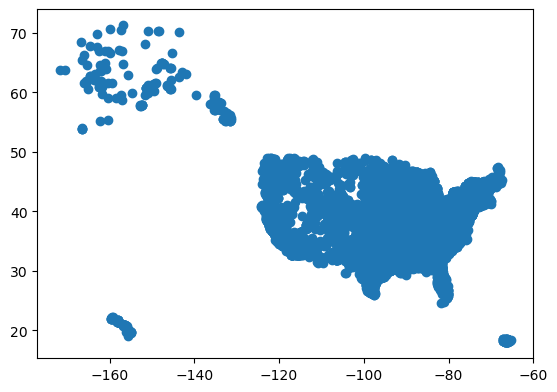

In [6]:
power_plants.plot()

## f-strings

We have printed variables using string concatination in 'print' function writing commas between every string, now we learn f strings. 

In [7]:
# Explore crs
print(f' The CRS of the power plant is: {power_plants.crs}')

print(f' Ellipsoid: {power_plants.crs.ellipsoid}')

print(f" Datum: {power_plants.crs.datum}")

 The CRS of the power plant is: EPSG:4269
 Ellipsoid: GRS 1980
 Datum: North American Datum 1983


In [8]:
print(f"{'Is the CRS geographic?': <25}{power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?': <25}{power_plants.crs.is_projected}")

Is the CRS geographic?   True
Is the CRS projected?    False


## States df


EPSG:4269


<Axes: >

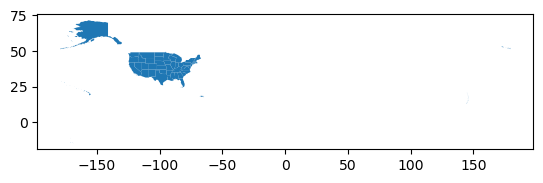

In [9]:
print(states.crs)
states.plot()

## `for` loops 
It can be easier to work with code as numbers, not strings, 


In [10]:
# Examine if the region, division, statefp columns are string or numeric
print(f"Region is string dtype? {is_string_dtype(states['region'])}")
print(f"Division is string dtype? {is_string_dtype(states['division'])}")
print(f"Statefp is string dtype? {is_string_dtype(states['statefp'])}")

Region is string dtype? True
Division is string dtype? True
Statefp is string dtype? True


In [11]:
for column in states:
    print(f"{column.capitalize()} is string dtype? {is_string_dtype(states[column])}")



Region is string dtype? True
Division is string dtype? True
Statefp is string dtype? True
Statens is string dtype? True
Geoid is string dtype? True
Stusps is string dtype? True
Name is string dtype? True
Lsad is string dtype? True
Mtfcc is string dtype? True
Funcstat is string dtype? True
Aland is string dtype? False
Awater is string dtype? False
Intptlat is string dtype? True
Intptlon is string dtype? True
Geometry is string dtype? False


**DRY code**
DRY = dont repeat yourself = if repeating more than twice, could be a for loop or function 

## `assert`
- keyword that does nothing if expression evaluates to `True` and raises `AssertionError` 


In [12]:
# Does nothing if statement is true

assert 2+2 == 4

assert 2+2 == 5


AssertionError: 

In [13]:
# Update code columns into integers 
code_columns = ['region', 'division', 'statefp']
for columns in code_columns:
    states[columns] = states[columns].astype('int')
    print(f"{columns.capitalize()} is string dtype? {is_numeric_dtype(states[columns])}")

Region is string dtype? True
Division is string dtype? True
Statefp is string dtype? True


In [14]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

## Data selection

We want to use only data for the contiguous states. We know the data covers a big extent. 


## Checkin
What are the unique region, division, state code
Which codes are the contiguous us

In [15]:
print("region", states["region"].unique())
print("division", states["division"].unique())
print("statefp", states["statefp"].unique())

region [3 2 1 4 9]
division [5 3 4 1 8 9 2 7 6 0]
statefp [54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


<Axes: >

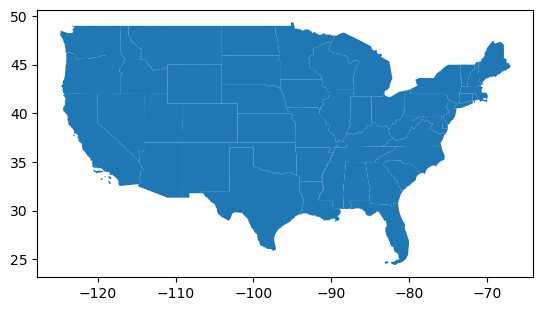

In [18]:
# Select contiguous US states
contiguous = states[(states.region!=9) & (~states.statefp.isin([2,15]))]
contiguous.plot()

The `~` negates a statement 

## Check-in

select the data in power_plants df for the contuguous us_states

<Axes: >

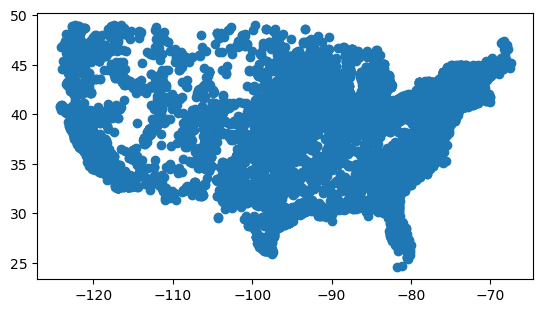

In [25]:
power_plants_cont = power_plants[~power_plants.state.isin(['Puerto Rico', 'Hawaii', 'Alaska'])]
power_plants_cont.plot()



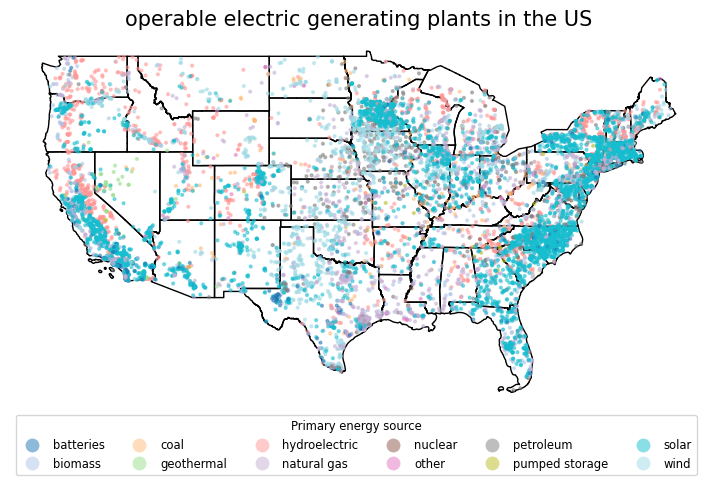

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))

# Removeve axis for a clenar map
ax.axis('off')

# Title
ax.set_title('operable electric generating plants in the US', fontsize=15)

#Add States
contiguous.plot(ax = ax,
                color = 'none')

# Color by primary source
power_plants_cont.plot(ax = ax,
                  column = 'primsource',
                  legend=True,
                  markersize = 4,
                  cmap = 'tab20',
                  alpha = .5,
                   legend_kwds={
                      'title': 'Primary energy source',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc': 'upper left',
                      'bbox_to_anchor': (0, 0),
                      'ncol': 6
                  })

plt.show()

## `for` with `zip`
Nee to iterate simulatianiously over two lists
`zip` combine two lists so that you can iterate over their elements in pairs. When used in a for loop, it allows you to process elements of each list together. 



In [32]:
# Iterate over a single list
numbers = [1, 2, 3]
for num in numbers:
    print(num)

print('\n')  # Blank line

# Iterate over two lists in pairs using zip()
letters = ['a', 'b', 'c']
for num, letter in zip(numbers, letters):
    print(num+1, letter)

1
2
3


2 a
3 b
4 c


Commonly repeat code for subplots

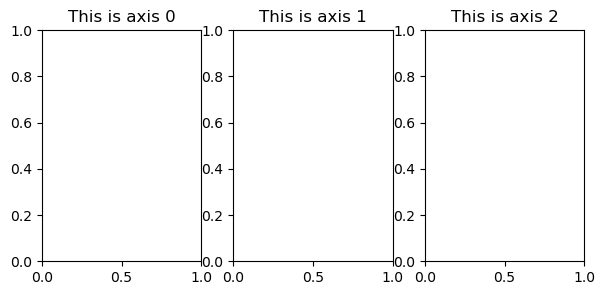

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

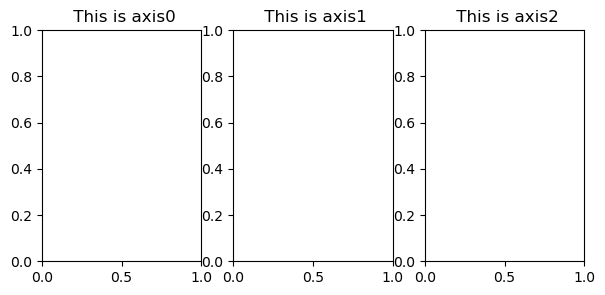

In [35]:
# Use zip to create subplots and avoid reduncancy
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

for ax, i in zip(axes, [0,1,2]):
    ax.set_title(f' This is axis{i}')

plt.show()


In [37]:
ca_power_plants = power_plants[power_plants.state.isin(['California'])]

ca_power_plants

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)
74,11644,151,McClure,12745,Modesto Irrigation District,Electric Utility,639 S. McClure Rd.,Modesto,Stanislaus,California,95354.0,natural gas,"Natural Gas = 53.5 MW, Petroleum = 53.5 MW",Natural Gas Fired Combustion Turbine; Petroleu...,142.4,107.0,NaN,NaN,NaN,NaN,NaN,NaN,53.5,NaN,53.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.931390,37.629360,POINT (-120.93139 37.62936)
80,11650,161,Turlock Lake,19281,Turlock Irrigation District,Electric Utility,21642 Davis Road,Hickman,Stanislaus,California,95323.0,hydroelectric,Hydroelectric = 3.3 MW,Conventional Hydroelectric,3.3,3.3,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.594678,37.611461,POINT (-120.59468 37.61146)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,23500,66472,San Manuel Central Plant Cogens,65525,San Manuel Mission Band of Indians,Industrial CHP,777 San Manuel Blvd.,Highland,San Bernardino,California,92346.0,natural gas,Natural Gas = 5 MW,Natural Gas Internal Combustion Engine,5.4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.230250,34.151193,POINT (-117.23025 34.15119)
11942,23511,66492,Henry Miller RD,65537,Henry Miller Reclamation District,Commercial Non-CHP,7767 Santa Rita Grade,Dos Palos,Merced,California,93620.0,solar,Solar = 1.5 MW,Solar Photovoltaic,1.5,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.635230,37.054300,POINT (-120.63523 37.05430)
11944,23513,66500,Valley Center 85,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 85 MW,Batteries,85.0,85.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)
11946,23515,66502,Valley Center 54,65552,Terra-Gen Operating Co-BESS 2,IPP Non-CHP,29523 Valley Center Road,Valley Center,San Diego,California,92082.0,batteries,Battery = 54 MW,Batteries,54.0,54.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-117.017744,33.227236,POINT (-117.01774 33.22724)


In [43]:

top_sources = ca_power_plants.groupby('primsource').sum('total_mw')['total_mw'].nlargest(3)

top_sources

primsource
natural gas      37891.6
solar            19338.5
hydroelectric    10481.4
Name: total_mw, dtype: float64

In [44]:
fp = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')
ca_boundary =gpd.read_file(fp)

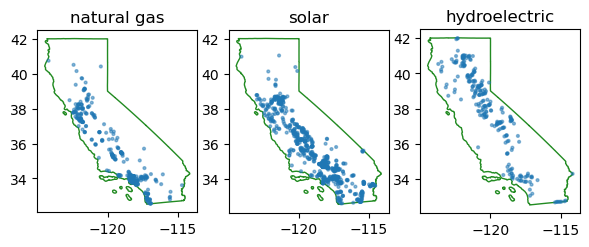

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 3))

for ax, i in zip(axes, ['natural gas', 'solar', 'hydroelectric']):
    ax.set_title(f'{i}')
    ca_boundary.plot(ax = ax, 
                 color = 'none',
                 edgecolor= 'forestgreen')
    ca_power_plants[ca_power_plants['primsource']== i].plot(ax = ax,
                  column = 'primsource',
                  legend=False,
                  markersize = 4,
                  cmap = 'tab20',
                  alpha = .5)
    

plt.show()


In [82]:
top_sources[0]


/var/folders/4w/6cbgl83j6w9995fb6vw1b3rc0000gn/T/ipykernel_91781/1912718316.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_sources[0]


37891.6